<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [5]:
df = pd.read_csv('states_edu.csv')

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [8]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KG',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [9]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [14]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

In [15]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

In [16]:
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  126
TOTAL_REVENUE                   126
FEDERAL_REVENUE                 126
STATE_REVENUE                   126
LOCAL_REVENUE                   126
TOTAL_EXPENDITURE               126
INSTRUCTION_EXPENDITURE         126
SUPPORT_SERVICES_EXPENDITURE    126
OTHER_EXPENDITURE               126
CAPITAL_OUTLAY_EXPENDITURE      126
ENROLL_PREK                      78
ENROLL_KG                        75
ENROLL_4                         75
ENROLL_8                         75
ENROLL_12                        75
ENROLL_PRIMARY                  126
ENROLL_HS                        75
ENROLL_ALL                       75
AVG_MATH_4_SCORE                 84
AVG_MATH_8_SCORE                 84
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [18]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

In [19]:
df['IEXPENDITURE_PER_SSEXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'] / df['SUPPORT_SERVICES_EXPENDITURE']

Final feature list: 
TOTAL_EXPENDITURE_PER_STUDENT
IEXPENDITURE_PER_SSEXPENDITURE

Feature selection justification: I selected TOTAL_EXPENDITURE_PER_STUDENT because each state is a different size with different funds, so naturally their expenditure is different. This variable tells how they spend their money per student. I selected IEXPENDITURE_PER_SSEXPENDITURE because I'm curious if how states choose to allocate their spending influences student performance.

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, '8th grade reading score')

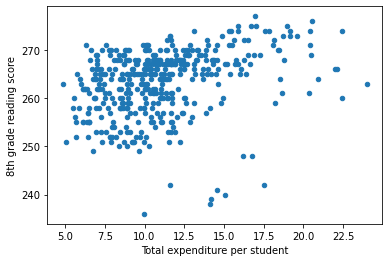

In [20]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT',y='AVG_READING_8_SCORE')
plt.xlabel('Total expenditure per student')
plt.ylabel('8th grade reading score')

This is a plot of the effect of a state's total expenditure per student on the 8th grade reading scores. There is generally a positive, linear trend.

Visualization 2

Text(0, 0.5, '8th grade reading score')

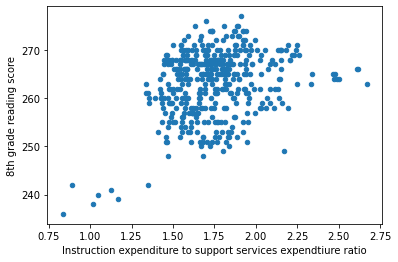

In [21]:
df.plot.scatter(x='IEXPENDITURE_PER_SSEXPENDITURE',y='AVG_READING_8_SCORE')
plt.xlabel('Instruction expenditure to support services expendtiure ratio')
plt.ylabel('8th grade reading score')

This is a plot of the effect of the instruction expenditure to support services expendtiure ratio on the 8th grade reading scores. There is generally a positive, linear trend.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [24]:
from sklearn.model_selection import train_test_split

In [57]:
X = df[['TOTAL_EXPENDITURE_PER_STUDENT','IEXPENDITURE_PER_SSEXPENDITURE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.4, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Regression

In [43]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [44]:
# create your model here
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
model.score(X_test, y_test)

0.7928866817954624

In [55]:
#mean error
np.mean(model.predict(X_test)-y_test)

-0.2255537077797505

In [50]:
#mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.384426105825526

In [51]:
# root mean squared error
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.0359221531162652

In [ ]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'IEXPENDITURE_PER_SSEXPENDITURE')

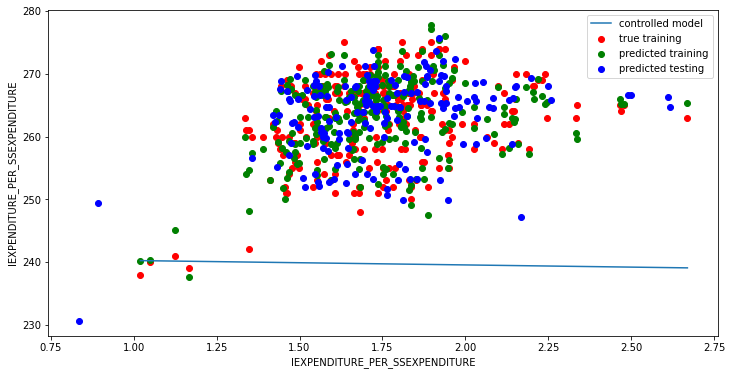

In [56]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'IEXPENDITURE_PER_SSEXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('IEXPENDITURE_PER_SSEXPENDITURE')

<h2> Summary </h2>

I found that a few individual variables had a strong correlation with 8th grade reading scores. Variables such as instruction expenditure to support services expendtiure ratio and expenditure per student both had relatively strong, positive, linear relationships with 8th grade reading scores. This means that, in general, the more that the state spends per student the better their scores will be, and the more that the state spends on instruction over support services, the higher the scores will be. When using a model with instruction expenditure to support services expendtiure ratio, expenditure per student, and 4th grade reading scores as variables, it was a very good predictor of 8th grade reading scores. This model had a high R^2 value of 0.79 and low mean absolute error of 2.38. All 3 of these variables would be good predictors of 8th grade reading scores.